In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [16]:
def conv_pytorch(image, conv_weights, stride = 1, pad = 1):
    image_tensor = torch.from_numpy(image)
    conv_weights_tensor = torch.from_numpy(conv_weights)
    output_tensor = torch.nn.functional.conv2d(image_tensor, conv_weights_tensor, stride = stride, padding = pad)

    return output_tensor.numpy()

In [28]:
array = np.array([[1, 2, 3]])
array = np.pad(array, ((2, 2), (2, 2)), "constant")
print(array)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [64]:
def conv_numpy_1(image, weights, stride = 1, pad = 1):
    
    batch_size, channels_in, image_height, image_width = image.shape
    channels_out, channels_in, kernel_height, kernel_width = weights.shape

    out_height = (int)((image_height + 2 * pad - kernel_height) / stride + 1)
    out_width = (int)((image_width + 2 * pad - kernel_width) / stride + 1)

    if pad != 0:
        image = np.pad(image, ((0, 0), (0, 0), (pad, pad), (pad, pad)), "constant")
    
    out = np.zeros((batch_size, channels_out, out_height, out_width))

    # for c_batch in range(batch_size):
    #     for c_y in range(out_height):
    #         for c_x in range(out_width):
    #             for c_channel_out in range(channels_out):
    #                 for c_channel_in in range(channels_in):
    #                     for c_kernel_y in range(kernel_height):
    #                         for c_kernel_x in range(kernel_width):
    #                             this_pixel_value = image[c_batch, c_channel_in, c_y + c_kernel_y - 2, c_x + c_kernel_x - 2]
    #                             this_weight = weights[c_channel_out, c_channel_in, c_kernel_y, c_kernel_x]
    #                             out[c_batch, c_channel_out, c_y, c_x] += this_pixel_value * this_weight

    for c_batch in range(batch_size):
        for c_channel_out in range(channels_out):
            for c_y in range(out_height):
                for c_x in range(out_width):
                    pass
    return out

Input shape:  (1, 1, 5, 5)
Kernel shape:  (1, 1, 3, 3)
Output shape:  (1, 1, 5, 5)
Output pytorch shape:  (1, 1, 5, 5)


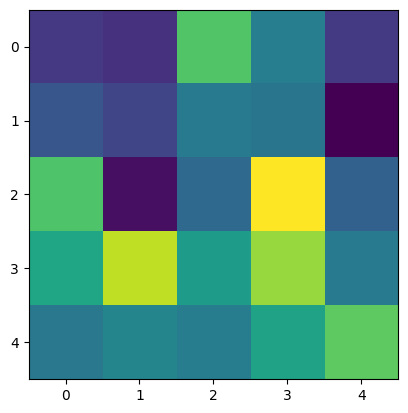

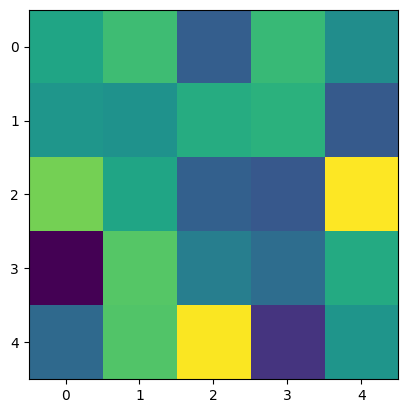

[[[[False False False False False]
   [False False False False False]
   [False False False False False]
   [False False False False False]
   [False False False False False]]]]
Conv result pytorch:  [[[[-1.72888432 -1.91445925  2.38905445  0.16157407 -1.7234098 ]
   [-1.00672463 -1.43223046  0.07924147 -0.12112561 -2.9584751 ]
   [ 2.35707784 -2.64692978 -0.44399233  4.36811938 -0.68707156]
   [ 1.35088385  3.66604794  1.10193287  3.22698318  0.09881557]
   [-0.0249988   0.36635384  0.15800747  1.25197608  2.53938403]]]]
Conv result numpy:  [[[[-0.06038434  0.55064134 -1.77177603  0.44781084 -0.63804329]
   [-0.43371719 -0.52537999  0.1395394   0.23685173 -1.87577127]
   [ 1.14561371 -0.05122697 -1.72888432 -1.91445925  2.38905445]
   [-3.54688312  0.81765824 -1.00672463 -1.43223046  0.07924147]
   [-1.51974478  0.78561436  2.35707784 -2.64692978 -0.44399233]]]]


In [68]:
np.random.seed(42)
n_batch = 1
image_height = 5
image_width = 5
channels_in = 1
kernel_size = 3
channels_out = 1

input_image = np.random.normal(size = (n_batch, channels_in, image_height, image_width))
conv_weights = np.random.normal(size = (channels_out, channels_in, kernel_size, kernel_size))
conv_results_pytorch = conv_pytorch(input_image, conv_weights, stride = 1, pad = 1)

print("Input shape: ", input_image.shape)
print("Kernel shape: ", conv_weights.shape)

conv_results_numpy = conv_numpy_1(input_image, conv_weights)
print("Output shape: ", conv_results_numpy.shape)
print("Output pytorch shape: ", conv_results_pytorch.shape)

plt.imshow(conv_results_pytorch.reshape((image_height, image_width)))
plt.show()

plt.imshow(conv_results_numpy.reshape((image_height, image_width)))
plt.show()

comparision = conv_results_pytorch == conv_results_numpy
print(comparision)
print("Conv result pytorch: ", conv_results_pytorch)
print("Conv result numpy: ", conv_results_numpy)